In [1]:
import keras as ks

Using TensorFlow backend.


In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist #import input dataset
from tensorflow.keras.models import Sequential#import model to quickly set up a neural network
from tensorflow.keras.layers import Dense, Dropout #some parameters to control bias and variance
from tensorflow.keras.optimizers import RMSprop

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

we need to explicitly convert the data into the format keras/tensorflow expects. We divide the image data by 255 in order to normalize it into 0-1 range after converting it into floating point values.

In [4]:
train_images= mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)

In [5]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [6]:
train_images /=255
test_images /=255

now will convert the 0-9 labels into one hot format, as we did with tensorflow

In [7]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

In [8]:
import matplotlib.pyplot as plt

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


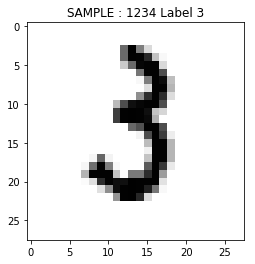

In [9]:
def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.title('SAMPLE : %d Label %d' %(num, label))
    plt.imshow(image,cmap = plt.get_cmap('gray_r'))
    plt.show()

display_sample(1234)

In [10]:
model = Sequential()
model.add(Dense(512, activation = 'relu' , input_shape=(784,)))
model.add(Dense(10, activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
#define loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer= RMSprop(), metrics=['accuracy']) # RMSprop is optimization technique like gradientDescent

In [ ]:
##building model 
history = model.fit(train_images, train_labels, batch_size=100, epochs=10, 
                    verbose=2, validation_data= (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10


In [ ]:
score = model_evaluate(test_images, test_labels, verbose=0)
print('Test Loss', score[0])
print('Test Accuracy', score[1])

In [ ]:
for x in range(1000):
    test_image = test_images[x, :].reshape(1, 784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if(predicted_cat != label):
        plt.titile('Prediction %d Label: %d' %(predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap = plt.get_cmap('gray_r'))
        plt.show()